<a href="https://colab.research.google.com/github/jscienciadados/pln/blob/main/PLN_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Processamento de Linguagem Natural**

# Importação das e Instalação das Bibliotecas

Spacy 

In [1]:
!pip install -q spacy==2.2.3

     |████████████████████████████████| 10.4 MB 18.2 MB/s 
     |████████████████████████████████| 2.2 MB 55.2 MB/s 


In [2]:
import bs4 as bs
import urllib.request
import nltk
import spacy

# Download do dicionario spacy em portugues

In [ ]:
!python3 -m spacy download pt

##Marcação
* POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
* Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
* Lista de tokens: https://spacy.io/api/annotation#pos-tagging
* Português: https://www.sketchengine.eu/ portuguese-freeling-part-of-speech-tagset/

# Gerando o dicionário

In [4]:
pln = spacy.load('pt')
pln

In [5]:
# documento -> sempre colocar o texto em um objeto spacy
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Vitória')

In [6]:
# type
type(documento)

spacy.tokens.doc.Doc

In [7]:
# percorrendo o documento
for token in documento:
  print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Vitória NOUN


##Lematização e Stemização

In [8]:
for token in documento:
  print(token.text, token.lemma_)

Estou Estou
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso cursar
em em
Vitória Vitória


In [9]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [10]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

Stemmer

In [11]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [12]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Estou Estou est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso cursar curs
em em em
Vitória Vitória vitór


##Carregando Textos da Web

In [13]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [14]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"6b5124da-c140-4ec4-8f0b-9a248eff7ec8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Intelig\xc3\xaancia_artificial","wgTitle":"Intelig\xc3\xaancia artificial","wgCurRevisionId":61440060,"wgRevisionId":61440060,"wgArticleId":12722,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros em refer\xc3\xa

Parser

In [15]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"6b5124da-c140-4ec4-8f0b-9a248eff7ec8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Inteligência_artificial","wgTitle":"Inteligência artificial","wgCurRevisionId":61440060,"wgRevisionId":61440060,"wgArticleId":12722,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros em referências","!CS1 manut: Nomes múltiplos: lista de autores","!CS1 inglês-fontes em líng

In [16]:
paragrafos = dados_html.find_all('p')

In [17]:
len(paragrafos)

105

In [18]:
paragrafos[1].text 

'Inteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia de produzir sistemas inteligentes". É uma área de p

In [19]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [20]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\nInteligência artificial (por vezes mencionada pela sigla em português IA ou pela sigla em inglês AI - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. Os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. Andreas Kaplan e Michael Haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] John McCarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em Darmouth Colege" Gubern, Román: O Eros Eletrónico), a define como "a ciência e engenharia 

In [21]:
# lower
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\ninteligência artificial (por vezes mencionada pela sigla em português ia ou pela sigla em inglês ai - artificial intelligence) é a inteligência similar à humana exibida por sistemas de software, além de também ser um campo de estudo acadêmico. os principais pesquisadores e livros didáticos definem o campo como "o estudo e projeto de agentes inteligentes", onde um agente inteligente é um sistema que percebe seu ambiente e toma atitudes que maximizam suas chances de sucesso. andreas kaplan e michael haenlein definem a inteligência artificial como “uma capacidade do sistema para interpretar corretamente dados externos, aprender a partir desses dados e utilizar essas aprendizagens para atingir objetivos e tarefas específicas através de adaptação flexível”.[1] john mccarthy, quem cunhou o termo em 1956 ("numa conferência de especialistas celebrada em darmouth colege" gubern, román: o eros eletrónico), a define como "a ciência e engenharia 

##Busca em Textos com SpaCy

In [22]:
pln = spacy.load('pt')
pln

In [23]:
string = 'turing'
token_pesquisa = pln(string)

In [24]:
pln.vocab

In [25]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [26]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3044, 3045),
 (8661325627334373315, 3054, 3055),
 (8661325627334373315, 3210, 3211),
 (8661325627334373315, 3215, 3216),
 (8661325627334373315, 3221, 3222),
 (8661325627334373315, 3284, 3285),
 (8661325627334373315, 3916, 3917),
 (8661325627334373315, 5191, 5192),
 (8661325627334373315, 8660, 8661),
 (8661325627334373315, 8796, 8797),
 (8661325627334373315, 8892, 8893),
 (8661325627334373315, 9009, 9010)]

In [31]:
doc[3044:3045], doc[3044-5:3045+5]

(turing, uma contribuição prática de alan turing foi o que se chamou)

In [32]:
doc[3215:3216], doc[3215-5:3216+5]

(turing, turing quanto o teste de turing talvez derivem da visão que)

# Retornando o Contexto

In [29]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 3044, 3045), 3044, 3045)

In [30]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f"""<p><strong>Resultados encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ... """))

##Extração de entidades nomeadas
* NER (Named-Entity Recognition)
* Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
* Usado em chatbots para saber o assunto falado
Siglas: https://spacy.io/api/annotation#named-entities


In [33]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

andreas kaplan PER
michael haenlein PER
john mccarthy PER
gubern PER
román LOC
inteligente[2 MISC
cotidiano).[4 ORG
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
google ORG
wikipedia MISC
john mccarthy PER
racionalmente".[10][11 MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
problem solver PER
gps PER
newell PER
gps ORG
brasil LOC
associação brasileira de inteligência artificial ORG
allen newell PER
herbert simon PER
universidade carnegie mellon ORG
marvin minsky PER
mit ai lab MISC
conferência de verão de 1956 MISC
darthmouth college.[14 LOC
advanced research projects agency” ORG
estados unidos LOC
generation project” MISC
japão LOC
sub-simbólico"?[16 LOC
john haugeland PER
good old-fashioned artificial intelligence MISC
w. grey walter PER
johns hopkins PER
universidade de princeton LOC
club ORG
inglater

Usando Recurso Visual

In [34]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

##Nuvem de Palavras - Word Cloud

In [35]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'custa', 'contudo', 'vêm', 'eu', 'boa', 'pouco', 'falta', 'estas', 'saber', 'oitavo', 'tanto', 'teus', 'dezoito', 'naquela', 'faço', 'que', 'tivemos', 'mal', 'você', 'estás', 'favor', 'tentei', 'essa', 'até', 'conhecido', 'onze', 'com', 'nível', 'dez', 'estiveste', 'vem', 'deste', 'máximo', 'teu', 'das', 'iniciar', 'muito', 'eventual', 'pelos', 'vão', 'todos', 'por', 'desse', 'vens', 'nós', 'nessa', 'questão', 'tão', 'vindo', 'cedo', 'comprida', 'sim', 'depois', 'entre', 'eles', 'valor', 'grande', 'é', 'fazia', 'números', 'obrigada', 'oito', 'sete', 'pelo', 'tais', 'primeira', 'nossa', 'tem', 'número', 'possível', 'ademais', 'ao', 'estes', 'toda', 'longe', 'sétimo', 'nossas', 'tentar', 'tiveram', 'aquele', 'primeiro', 'ter', 'está', 'fazemos', 'próprio', 'alguns', 'quê', 'vez', 'agora', 'põem', 'ali', 'querem', 'exemplo', 'dar', 'dezasseis', 'dos', 'diz', 'uma', 'segunda', 'nada', 'sem', 'nas', 'cada', 'sabe', 'tenho', 'ambos', 'ver', 'esteve', 'corrente', 'outra', 'seu', 'têm', 'dois

In [36]:
len(STOP_WORDS)

413

Stop word em ingles

In [37]:
pln.vocab['usa'].is_stop

True

In [38]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [48]:
for i in lista_token:
  print(i)
  

  

Streaming output truncated to the last 5000 lines.
)
pode
ser
resumido
em
poucas
etapas
:
a
primeira
etapa
consiste
em
gravar
as
declarações
realizadas
por
alguns
indivíduos
que
verbalizam
seu
pensamento
enquanto
resolvem
os
problemas
.
a
seguir
,
o
teórico
ensaia
algumas
hipóteses
acerca
dos
processos
mentais
que
possivelmente
estariam
envolvidos
no
processo
de
elaboração
de
uma
solução
para
o
problema
dado
.
a
partir
d
essas
hipóteses
ele
estrutura
um
programa
que
,
em
sua
opinião
,
simulará
o
relato
gravado
.
finalmente
,
após
processar
esse
programa
no
computador
digital
,
ele
compara
o
relato
do
indivíduo
com
o
roteiro
da
máquina
.
se
os
fluxos
de
palavras
registrados
no
roteiro
e
no
relatório
forem
razoavelmente
semelhantes
,
então
considera-se
que
uma
explicação
para
o
comportamento
sob
estudo
foi
obtida
.
os
pesquisadores
do
projeto
de
simulação
cognitiva
admitem
,
n
este
caso
,
que
as
estratégias
utilizadas
pelo
computador
são
análogas
à
quelas
realizadas
pelo
indivíduo
humano

In [40]:
len(lista_token)

9939

Documento sem stop word

In [41]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [42]:
len(sem_stop)

6602

In [43]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

# Gerando a word cloud

In [44]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 100, colormap=color_map)

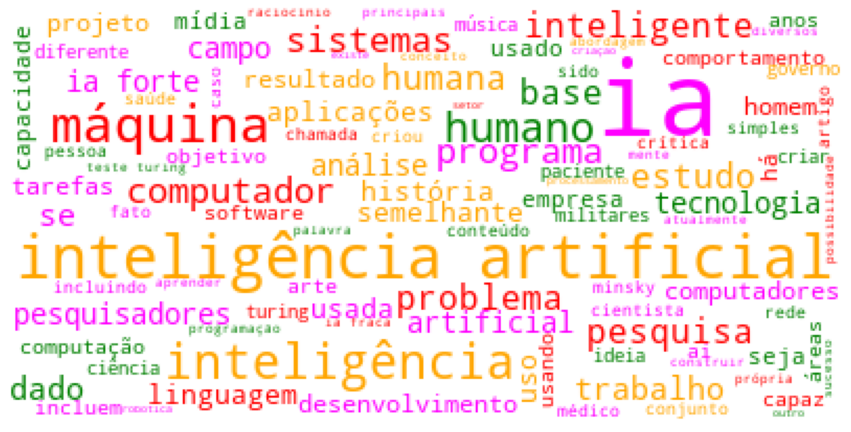

In [45]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()